In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
import env
import acquire
import explore

In [2]:
#Sets options to show more information
pd.options.display.max_columns = None
pd.options.display.width = 100
pd.options.display.max_colwidth = None
pd.options.display.max_rows = 200

In [3]:
df = acquire.wrangle_zillow()

In [4]:
df.shape

(77613, 69)

In [5]:
df_sorted = df.sort_values(['parcelid','transactiondate'], ascending=False)

In [6]:
df_sorted = df_sorted[~df_sorted['parcelid'].duplicated()]

In [7]:
df_sorted.shape

(77414, 69)

In [8]:
df_sorted.head(5)

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,id.1,logerror,transactiondate,propertylandusedesc,storydesc,typeconstructiondesc
16654,167689317,NaN,NaN,269.0,NaN,NaN,NaN,NaN,2535331,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,34045062.0,-118020570.0,NaN,NaN,NaN,NaN,NaN,NaN,010D,EMR1B*,6.037434e+07,NaN,3101.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,318400.0,437387.0,2016.0,118987.0,5947.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16654,-0.008789,2017-03-14,Planned Unit Development,NaN,NaN
7892,167688532,NaN,NaN,266.0,2.0,NaN,NaN,1.0,2758757,NaN,3.0,3.0,4.0,3.0,NaN,NaN,1661.0,1661.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34108983.0,-118262402.0,NaN,NaN,NaN,NaN,NaN,NaN,010C,LARD2,6.037187e+07,NaN,3101.0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,2016.0,NaN,NaN,NaN,147921.0,2016.0,147921.0,1902.75,NaN,NaN,NaN,Central,NaN,NaN,Central,7892,0.006706,2017-02-03,Condominium,NaN,NaN
41688,167687839,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1372384,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,34048223.0,-118520239.0,NaN,NaN,NaN,NaN,NaN,NaN,0100,LAR1,6.037263e+07,NaN,3101.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1842678.0,2016.0,1842678.0,22045.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41688,0.038797,2017-05-31,Single Family Residential,NaN,NaN
14557,167687739,NaN,NaN,266.0,NaN,NaN,NaN,NaN,2863262,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,34041716.0,-118455310.0,NaN,NaN,NaN,NaN,NaN,NaN,010C,LAR3,6.037268e+07,NaN,3101.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5451600.0,6440197.0,2016.0,988597.0,77045.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14557,0.360020,2017-03-03,Condominium,NaN,NaN
13467,167686999,NaN,NaN,261.0,NaN,NaN,NaN,NaN,775695,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,34424104.0,-118468083.0,NaN,NaN,NaN,NaN,NaN,NaN,0100,SCRM,6.037920e+07,NaN,3101.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26405.0,2016.0,26405.0,988.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13467,-0.068632,2017-02-28,Single Family Residential,NaN,NaN


In [9]:
#Fill with zeros
cols_to_fill = ['basementsqft', 'decktypeid', 'fireplacecnt', 'garagecarcnt', 'garagetotalsqft',
                'hashottuborspa', 'poolcnt', 'poolsizesum', 'pooltypeid2','pooltypeid7',
                'pooltypeid10','fireplaceflag', 'taxdelinquencyflag', 'airconditioningdesc'] 

In [10]:
df_sorted[cols_to_fill] = df_sorted[cols_to_fill].fillna(0)

In [11]:
df_sorted.head()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,id.1,logerror,transactiondate,propertylandusedesc,storydesc,typeconstructiondesc
16654,167689317,NaN,NaN,269.0,NaN,NaN,NaN,NaN,2535331,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,0.0,NaN,0.0,0.0,0.0,34045062.0,-118020570.0,NaN,0.0,0.0,0.0,0.0,0.0,010D,EMR1B*,6.037434e+07,NaN,3101.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,318400.0,437387.0,2016.0,118987.0,5947.25,0,NaN,NaN,0,NaN,NaN,NaN,16654,-0.008789,2017-03-14,Planned Unit Development,NaN,NaN
7892,167688532,NaN,NaN,266.0,2.0,NaN,NaN,1.0,2758757,0.0,3.0,3.0,4.0,3.0,0.0,NaN,1661.0,1661.0,NaN,NaN,NaN,NaN,6037.0,0.0,3.0,0.0,0.0,0.0,34108983.0,-118262402.0,NaN,0.0,0.0,0.0,0.0,0.0,010C,LARD2,6.037187e+07,NaN,3101.0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,2016.0,NaN,0.0,NaN,147921.0,2016.0,147921.0,1902.75,0,NaN,NaN,Central,NaN,NaN,Central,7892,0.006706,2017-02-03,Condominium,NaN,NaN
41688,167687839,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1372384,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,0.0,NaN,0.0,0.0,0.0,34048223.0,-118520239.0,NaN,0.0,0.0,0.0,0.0,0.0,0100,LAR1,6.037263e+07,NaN,3101.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1842678.0,2016.0,1842678.0,22045.81,0,NaN,NaN,0,NaN,NaN,NaN,41688,0.038797,2017-05-31,Single Family Residential,NaN,NaN
14557,167687739,NaN,NaN,266.0,NaN,NaN,NaN,NaN,2863262,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,0.0,NaN,0.0,0.0,0.0,34041716.0,-118455310.0,NaN,0.0,0.0,0.0,0.0,0.0,010C,LAR3,6.037268e+07,NaN,3101.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5451600.0,6440197.0,2016.0,988597.0,77045.13,0,NaN,NaN,0,NaN,NaN,NaN,14557,0.360020,2017-03-03,Condominium,NaN,NaN
13467,167686999,NaN,NaN,261.0,NaN,NaN,NaN,NaN,775695,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,0.0,NaN,0.0,0.0,0.0,34424104.0,-118468083.0,NaN,0.0,0.0,0.0,0.0,0.0,0100,SCRM,6.037920e+07,NaN,3101.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,26405.0,2016.0,26405.0,988.48,0,NaN,NaN,0,NaN,NaN,NaN,13467,-0.068632,2017-02-28,Single Family Residential,NaN,NaN


#Drop column
cols_to_drop = ['typeconstructiontypeid', 'storytypeid', 'heatingorsystemtypeid', 'buildingclasstypeid', 'airconditioningtypeid', 'parcelid', 'buildingqualitytypeid',
                'propertylandusetypeid', 'storytypedesc', 'buildingclassdesc', 'finishedfloor1squarefeet']
                

In [12]:
df_sorted = df_sorted[df_sorted['latitude'].notna()]

## Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [13]:
df_sorted.shape

(77381, 69)

In [14]:
df_sorted.describe()

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id.1,logerror
count,7.738100e+04,222.000000,50.0,77381.000000,49440.000000,15.000000,206.000000,24953.000000,7.738100e+04,77381.000000,77381.000000,77381.000000,49672.000000,76772.000000,77381.000000,6023.000000,77185.000000,73749.000000,41.000000,3009.000000,6023.000000,386.000000,77381.000000,77381.000000,76772.000000,77381.000000,77381.000000,77381.000000,7.738100e+04,7.738100e+04,6.914200e+04,77381.000000,77381.000000,77381.000000,77381.000000,77381.000000,7.738100e+04,75910.000000,77381.000000,30890.000000,77331.000000,77381.000000,10096.000000,50563.000000,2388.000000,70.000000,77118.000000,17560.000000,77381.000000,7.726900e+04,7.738000e+04,77381.0,7.737900e+04,77376.000000,2886.000000,7.713700e+04,77381.000000,77381.000000
mean,1.300715e+07,6.040541,7.0,261.826340,3.920510,3.933333,7.388350,1.813289,1.495139e+06,0.439203,2.299130,3.053489,6.534587,2.316867,0.523694,1366.512535,1785.219939,1760.522543,1389.853659,2357.791625,1381.771542,2082.500000,6048.819232,0.127396,2.250482,0.597653,115.257647,0.019876,3.400837e+07,-1.182036e+08,2.996928e+04,0.208540,5.802897,0.005996,0.013879,0.194389,6.049129e+07,33671.242708,2534.158333,187734.864066,96587.086822,1.476952,1.009608,1.110021,305.411223,216.385714,1968.635831,1.434738,0.002223,1.893145e+05,4.901345e+05,2016.0,3.010954e+05,5995.532346,14.087318,6.049673e+13,38847.885437,0.016625
std,3.481346e+06,0.557285,0.0,5.141199,3.592779,0.258199,2.734542,2.967894,8.609071e+05,24.486163,0.996651,1.139096,1.721953,0.979755,5.855768,671.308125,954.049286,934.024340,123.531688,1188.775210,726.468878,1240.382784,20.748199,0.401634,0.966552,0.917488,222.736138,0.139574,2.653888e+05,3.594826e+05,1.233711e+05,0.406267,56.979351,0.077204,0.116991,0.395732,2.059052e+05,47169.815982,801.593352,165118.791740,3798.347098,2.824386,0.118630,1.171154,238.392793,190.177514,23.786032,0.544569,0.047094,2.300874e+05,6.534440e+05,0.0,4.925960e+05,7622.844153,2.185663,1.535242e+12,22402.157729,0.170191
min,1.071186e+07,4.000000,7.0,31.000000,1.000000,3.000000,2.000000,1.000000,3.490000e+02,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,44.000000,128.000000,128.000000,1056.000000,598.000000,44.000000,380.000000,6037.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.333953e+07,-1.194754e+08,2.360000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,1.000000,1.000000,11.000000,12.000000,1824.000000,1.000000,0.000000,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,0.000000,-4.655420
25%,1.153830e+07,6.000000,7.0,261.000000,2.000000,4.000000,7.000000,1.000000,7.520700e+05,0.000000,2.000000,2.000000,6.000000,2.000000,0.000000,955.000000,1182.000000,1172.000000,1344.000000,1625.000000,956.000000,993.750000,6037.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.381457e+07,-1.184153e+08,5.700000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,6.037311e+07,12447.000000,1286.000000,46736.000000,96193.000000,0.000000,1.000000,1.000000,170.000000,61.500000,1953.000000,1.000000,0.000000,8.426500e+04,2.070000e+05,201

In [15]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 16654 to 55006
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   parcelid                      77381 non-null  int64         
 1   typeconstructiontypeid        222 non-null    float64       
 2   storytypeid                   50 non-null     float64       
 3   propertylandusetypeid         77381 non-null  float64       
 4   heatingorsystemtypeid         49440 non-null  float64       
 5   buildingclasstypeid           15 non-null     float64       
 6   architecturalstyletypeid      206 non-null    float64       
 7   airconditioningtypeid         24953 non-null  float64       
 8   id                            77381 non-null  int64         
 9   basementsqft                  77381 non-null  float64       
 10  bathroomcnt                   77381 non-null  float64       
 11  bedroomcnt              

In [16]:
for col in df_sorted:
    print(f'Unique values of:   {col:30}                {df_sorted[col].value_counts().sum()}')

Unique values of:   parcelid                                      77381
Unique values of:   typeconstructiontypeid                        222
Unique values of:   storytypeid                                   50
Unique values of:   propertylandusetypeid                         77381
Unique values of:   heatingorsystemtypeid                         49440
Unique values of:   buildingclasstypeid                           15
Unique values of:   architecturalstyletypeid                      206
Unique values of:   airconditioningtypeid                         24953
Unique values of:   id                                            77381
Unique values of:   basementsqft                                  77381
Unique values of:   bathroomcnt                                   77381
Unique values of:   bedroomcnt                                    77381
Unique values of:   buildingqualitytypeid                         49672
Unique values of:   calculatedbathnbr                             76772
Un

Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [17]:
def find_na(df):
    list_of_na = []
    for col in df:
        temp_dict = {'column_name': f'{col}' , 
                     'num_rows_missing': df[col].isna().sum(),
                     'unique_values': df_sorted[col].value_counts().sum(),
                     'pct_rows_missing': round(df[col].isna().sum() / len(df[col]),5)
                     }

        list_of_na.append(temp_dict)

    na_df = pd.DataFrame(list_of_na)
    na_df.set_index('column_name')
    return na_df

In [18]:
na_frame = find_na(df_sorted)

In [19]:
df_sorted['propertylandusedesc'].value_counts()

Single Family Residential                     52320
Condominium                                   19294
Duplex (2 Units, Any Combination)              2009
Planned Unit Development                       1944
Quadruplex (4 Units, Any Combination)           727
Triplex (3 Units, Any Combination)              535
Cluster Home                                    333
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       58
Residential General                              37
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse                                         6
Name: propertylandusedesc, dtype: int64

In [20]:
na_frame

,column_name,num_rows_missing,unique_values,pct_rows_missing
0,parcelid,0,77381,0.00000
1,typeconstructiontypeid,77159,222,0.99713
2,storytypeid,77331,50,0.99935
3,propertylandusetypeid,0,77381,0.00000
4,heatingorsystemtypeid,27941,49440,0.36108
5,buildingclasstypeid,77366,15,0.99981
6,architecturalstyletypeid,77175,206,0.99734
7,airconditioningtypeid,52428,24953,0.67753
8,id,0,77381,0.00000
9,basementsqft,0,77381,0.00000


For columns with count or 'cnt' then I would impute 0 for the na value. Other columns like 'storydesc', I'd probably drop the column.

# Prepare

In [21]:
df[(df.isna().sum(axis=1)/len(df.columns)) > .25]

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,id.1,logerror,transactiondate,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1727539,NaN,3.5,4.0,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,NaN,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,1.0,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,NaN,NaN,NaN,NaN,0,0.025595,2017-01-01,Single Family Residential,NaN,NaN
1,17052889,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1387261,NaN,1.0,2.0,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,NaN,NaN,NaN,NaN,1,0.055619,2017-01-01,Single Family Residential,NaN,NaN
2,14186244,NaN,NaN,261.0,NaN,NaN,NaN,NaN,11677,NaN,2.0,3.0,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,NaN,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,NaN,NaN,NaN,NaN,2,0.005383,2017-01-01,Single Family Residential,NaN,NaN
3,12177905,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2288172,NaN,3.0,4.0,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,1.0,0101,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,NaN,NaN,NaN,Central,3,-0.103410,2017-01-01,Single Family Residential,NaN,NaN
4,10887214,NaN,NaN,266.0,2.0,NaN,NaN,1.0,1970746,NaN,3.0,3.0,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34185120.0,-118414640.0,278581.0,1.0,NaN,NaN,NaN,1.0,010C,LAR3,6.037124e+07,12447.0,3101.0,268548.0,96451.0,0.0,NaN,1.0,NaN,NaN,1964.0,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13,Central,NaN,NaN,Central,4,0.006940,2017-01-01,Condominium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77608,10833991,NaN,NaN,266.0,2.0,NaN,NaN,1.0,2864704,NaN,3.0,3.0,8.0,3.0,NaN,NaN,1741.0,1741.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34202400.0,-118502000.0,59487.0,1.0,NaN,NaN,NaN,1.0,010C,LARD3,6.037132e+07,12447.0,3101.0,32368.0,96415.0,0.0,NaN,1.0,NaN,NaN,1980.0,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13,Central,NaN,NaN,Central,77608,-0.002245,2017-09-20,Condominium,NaN,NaN
77609,11000655,NaN,NaN,261.0,2.0,NaN,NaN,NaN,673515,NaN,2.0,2.0,6.0,2.0,NaN,NaN,1286.0,1286.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,34

In [22]:
house_type = [261, 263, 275, 260, 264]

In [23]:
df_sorted = df_sorted[df_sorted['propertylandusetypeid'].isin(house_type)]

In [24]:
prop_required_row = 0.3
num_rows = int(len(df_sorted.columns) * prop_required_row)

In [25]:
df_sorted.dropna(thresh=num_rows)

,parcelid,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,id.1,logerror,transactiondate,propertylandusedesc,storydesc,typeconstructiondesc
41688,167687839,NaN,NaN,261.0,NaN,NaN,NaN,NaN,1372384,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,0.0,NaN,0.0,0.0,0.0,34048223.0,-118520239.0,NaN,0.0,0.0,0.0,0.0,0.0,0100,LAR1,6.037263e+07,NaN,3101.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1842678.0,2016.0,1842678.0,22045.81,0,NaN,NaN,0,NaN,NaN,NaN,41688,0.038797,2017-05-31,Single Family Residential,NaN,NaN
13467,167686999,NaN,NaN,261.0,NaN,NaN,NaN,NaN,775695,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,0.0,NaN,0.0,0.0,0.0,34424104.0,-118468083.0,NaN,0.0,0.0,0.0,0.0,0.0,0100,SCRM,6.037920e+07,NaN,3101.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,26405.0,2016.0,26405.0,988.48,0,NaN,NaN,0,NaN,NaN,NaN,13467,-0.068632,2017-02-28,Single Family Residential,NaN,NaN
35555,167639152,NaN,NaN,261.0,2.0,NaN,NaN,1.0,74677,0.0,4.0,5.0,4.0,4.0,0.0,NaN,4232.0,4232.0,NaN,NaN,NaN,NaN,6037.0,0.0,4.0,0.0,0.0,0.0,33981300.0,-117803849.0,NaN,0.0,0.0,0.0,0.0,0.0,0100,LCR140000*,6.037403e+07,NaN,3101.0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,1977.0,NaN,0.0,800000.0,1600000.0,2016.0,800000.0,17926.36,0,NaN,NaN,Central,NaN,NaN,Central,35555,0.019842,2017-05-12,Single Family Residential,NaN,NaN
46162,167638003,NaN,NaN,261.0,2.0,NaN,NaN,1.0,835451,0.0,3.0,3.0,4.0,3.0,0.0,NaN,2108.0,2108.0,NaN,NaN,NaN,NaN,6037.0,0.0,3.0,0.0,0.0,0.0,34126076.0,-118226237.0,NaN,0.0,0.0,0.0,0.0,0.0,0100,LAR1,6.037186e+07,NaN,3101.0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,2014.0,NaN,0.0,303559.0,709659.0,2016.0,406100.0,8621.13,0,NaN,NaN,Central,NaN,NaN,Central,46162,-0.158701,2017-06-14,Single Family Residential,NaN,NaN
62572,167637371,NaN,NaN,261.0,2.0,NaN,NaN,1.0,358149,0.0,5.0,4.0,NaN,5.0,0.0,NaN,4000.0,4000.0,NaN,NaN,NaN,NaN,6037.0,0.0,5.0,0.0,0.0,0.0,34089958.0,-118451987.0,NaN,1.0,0.0,0.0,0.0,1.0,0101,LARE20,6.037262e+07,NaN,3101.0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,2013.0,NaN,0.0,1664376.0,2597367.0,2016.0,932991.0,54391.29,0,NaN,NaN,Central,NaN,NaN,Central,62572,2.069414,2017-07-31,Single Family Residential,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20378,10711923,NaN,NaN,261.0,2.0,NaN,NaN,NaN,2190858,0.0,2.0,4.0,8.0,2.0,0.0,NaN,1918.0,1918.0,NaN,NaN,NaN,NaN,6037.0,0.0,2.0,0.0,0.0,0.0,34220619.0,-118615253.0,11239.0,1.0,0.0,0.0,0.0,1.0,0101,LARE11,6.037113e+07,12447.0,3101.0,268588.0,96339.0,0.0,NaN,1.0,NaN,NaN,1960.0,NaN,0.0,167869.0,415459.0,2016.0,247590.0,5239.85,0,NaN,6.037113e+13,0,NaN,NaN,Central,20378,-0.009496,2017-03-24,Single Family Residential,NaN,NaN
18017,10711910,NaN,NaN,261.0,2.0,NaN,NaN,NaN,1878109,0.0,2.0,3.0,8.0,2.0,0.0,NaN,1477.0,1477.0,NaN,NaN,NaN,NaN,6037.0,0.0,2.0,0.0,0.0,0.0,34221864.0,-118615739.0,11285.0,1.0,0.0,0.0,0.0,1.0,0101,LARE11,6.03711

In [26]:
def handle_missing_values(df, prop_required_column = .4, prop_required_row = .25):
    """
    This function drops columns then rows which contain a certain amount of null values.
    """
    #Lists to hold values
    drop_cols = []
    drop_rows = []
    na_cols_not_drop = ['taxdelinquencyyear']
    
    #Finds columns with lots of na values
    for col in df:
        if (df[col].isna().sum()/len(df) > prop_required_column):
            if col in na_cols_not_drop:
                pass
            else:
                drop_cols.append(f'{col}')
    #Drops columns with lots of na values        
    df = df.drop(columns=drop_cols)
    num_rows = int(len(df.columns) * prop_required_row)
    #Drops rows with lots of na values
    df = df.dropna(thresh=num_rows) 
    
    return df

In [27]:
df_sorted = handle_missing_values(df_sorted, prop_required_row=.3)

In [28]:
df_sorted.head()

,parcelid,propertylandusetypeid,heatingorsystemtypeid,id,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,heatingorsystemdesc,id.1,logerror,transactiondate,propertylandusedesc
41688,167687839,261.0,NaN,1372384,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,6037.0,0.0,NaN,0.0,0.0,0.0,34048223.0,-118520239.0,NaN,0.0,0.0,0.0,0.0,0.0,0100,LAR1,6.037263e+07,NaN,3101.0,NaN,0.0,NaN,NaN,0.0,NaN,1842678.0,2016.0,1842678.0,22045.81,0,NaN,NaN,0,NaN,41688,0.038797,2017-05-31,Single Family Residential
13467,167686999,261.0,NaN,775695,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,6037.0,0.0,NaN,0.0,0.0,0.0,34424104.0,-118468083.0,NaN,0.0,0.0,0.0,0.0,0.0,0100,SCRM,6.037920e+07,NaN,3101.0,NaN,0.0,NaN,NaN,0.0,NaN,26405.0,2016.0,26405.0,988.48,0,NaN,NaN,0,NaN,13467,-0.068632,2017-02-28,Single Family Residential
35555,167639152,261.0,2.0,74677,0.0,4.0,5.0,4.0,4.0,0.0,4232.0,4232.0,6037.0,0.0,4.0,0.0,0.0,0.0,33981300.0,-117803849.0,NaN,0.0,0.0,0.0,0.0,0.0,0100,LCR140000*,6.037403e+07,NaN,3101.0,NaN,0.0,1.0,1977.0,0.0,800000.0,1600000.0,2016.0,800000.0,17926.36,0,NaN,NaN,Central,Central,35555,0.019842,2017-05-12,Single Family Residential
46162,167638003,261.0,2.0,835451,0.0,3.0,3.0,4.0,3.0,0.0,2108.0,2108.0,6037.0,0.0,3.0,0.0,0.0,0.0,34126076.0,-118226237.0,NaN,0.0,0.0,0.0,0.0,0.0,0100,LAR1,6.037186e+07,NaN,3101.0,NaN,0.0,1.0,2014.0,0.0,303559.0,709659.0,2016.0,406100.0,8621.13,0,NaN,NaN,Central,Central,46162,-0.158701,2017-06-14,Single Family Residential
62572,167637371,261.0,2.0,358149,0.0,5.0,4.0,NaN,5.0,0.0,4000.0,4000.0,6037.0,0.0,5.0,0.0,0.0,0.0,34089958.0,-118451987.0,NaN,1.0,0.0,0.0,0.0,1.0,0101,LARE20,6.037262e+07,NaN,3101.0,NaN,0.0,1.0,2013.0,0.0,1664376.0,2597367.0,2016.0,932991.0,54391.29,0,NaN,NaN,Central,Central,62572,2.069414,2017-07-31,Single Family Residential


In [29]:
target_col = 'taxvaluedollarcnt'

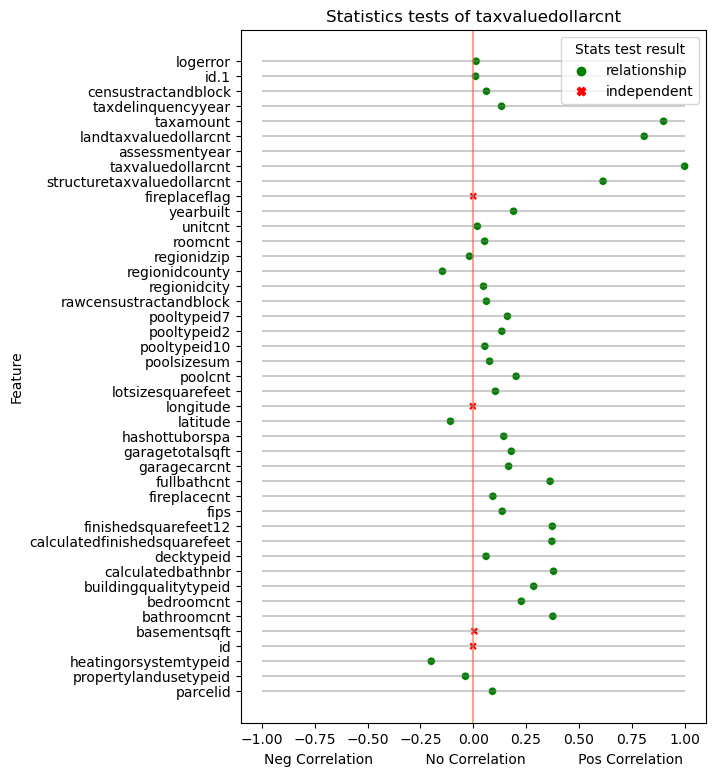

In [30]:
explore.correlation_test(df_sorted, target_col)

In [31]:
i=0
for col in df:
    cols = df.columns.to_list()
    percent_col = len(df[col].unique()) / len(df[col])
    print(f'{col:30}                   {len(df[col].unique()):15}                   {percent_col:.4f}')
    #print(f'{col} has {percent_col} unique values.')
    i += 1

parcelid                                                   77414                   0.9974
typeconstructiontypeid                                         5                   0.0001
storytypeid                                                    2                   0.0000
propertylandusetypeid                                         14                   0.0002
heatingorsystemtypeid                                         11                   0.0001
buildingclasstypeid                                            3                   0.0000
architecturalstyletypeid                                       6                   0.0001
airconditioningtypeid                                          6                   0.0001
id                                                         77414                   0.9974
basementsqft                                                  44                   0.0006
bathroomcnt                                                   23                   0.0003
bedroomcnt